<a href="https://colab.research.google.com/github/oshanmay11/my_projects/blob/main/Fish_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import kagglehub
path = kagglehub.dataset_download("vipullrathod/fish-market")

Using Colab cache for faster access to the 'fish-market' dataset.


In [39]:
df = pd.read_csv(path + "/Fish.csv")

In [40]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [41]:
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [42]:
y = df["Species"]
x = df.drop("Species", axis=1)

In [43]:
y

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
...,...
154,Smelt
155,Smelt
156,Smelt
157,Smelt


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [46]:
species_mappings = {index:label for index,label in enumerate(le.classes_)}

In [47]:
species_mappings

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = sc.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x.columns)

In [51]:
x_test

,Weight,Length1,Length2,Length3,Height,Width
0,1.671615,0.674393,0.750549,0.930882,2.335881,1.243201
1,-0.819759,-0.717855,-0.723705,-0.683683,-0.701119,-0.683592
2,0.539172,0.269555,0.289845,0.469578,1.389337,0.409171
3,-0.791448,-0.609240,-0.585493,-0.658055,-0.762274,-0.491594
4,-0.918848,-0.836344,-0.815845,-0.914335,-0.945311,-0.987749
5,0.680727,0.427541,0.428056,0.597718,1.275684,0.733419
6,-0.748982,-0.609240,-0.631564,-0.632427,-0.578314,-0.535969
7,0.256061,0.200436,0.197704,0.384151,1.251468,0.201741
8,-1.159492,-0.757351,-0.769775,-0.760567,-0.615844,-0.650224
9,-0.748982,-0.461128,-0.447282,-0.529915,-0.639539,-0.374544


In [52]:
x_train

,Weight,Length1,Length2,Length3,Height,Width
0,1.218638,0.575652,0.566267,0.478121,0.569689,1.937759
1,-0.310160,0.802757,0.778191,0.691687,-0.660019,-0.261104
2,0.369306,0.180688,0.197704,0.196212,0.393652,1.219325
3,-0.310160,-0.145157,-0.143217,-0.256549,-0.178872,0.389663
4,-0.706515,-0.549995,-0.585493,-0.572628,-0.633627,-0.389102
...,...,...,...,...,...,...
122,-0.182760,0.921246,0.888760,0.794200,-0.634573,-0.286028
123,0.256061,1.513692,1.487675,1.392187,-0.501197,0.249144
124,-1.142789,-1.892873,-1.884679,-1.956541,-1.647664,-1.782063
125,1.530059,2.135760,2.105019,1.998717,-0.036226,0.991746


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [55]:
logistic_model.score(x_test, y_test)

0.78125

In [56]:
import tensorflow as tf

In [57]:
inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(64, activation="relu")(inputs)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(7, activation="softmax")(x)

In [58]:
nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [59]:
nn_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [60]:
batch_size = 32
epochs = 700
history = nn_model.fit(
    x_train, y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.2957 - loss: 1.8889 - val_accuracy: 0.3846 - val_loss: 1.8193
Epoch 2/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4901 - loss: 1.7113 - val_accuracy: 0.3462 - val_loss: 1.7312
Epoch 3/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5832 - loss: 1.5786 - val_accuracy: 0.3077 - val_loss: 1.6583
Epoch 4/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5432 - loss: 1.4957 - val_accuracy: 0.3077 - val_loss: 1.5791
Epoch 5/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6303 - loss: 1.3490 - val_accuracy: 0.4231 - val_loss: 1.5091
Epoch 6/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6183 - loss: 1.2859 - val_accuracy: 0.4615 - val_loss: 1.4249
Epoch 7/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6658 - loss: 1.1923 - val_accuracy: 0.4615 - val_loss: 1.3539
Epoch 8/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6618 - loss: 1.1734 - val_accuracy: 0.5769 - val_loss:

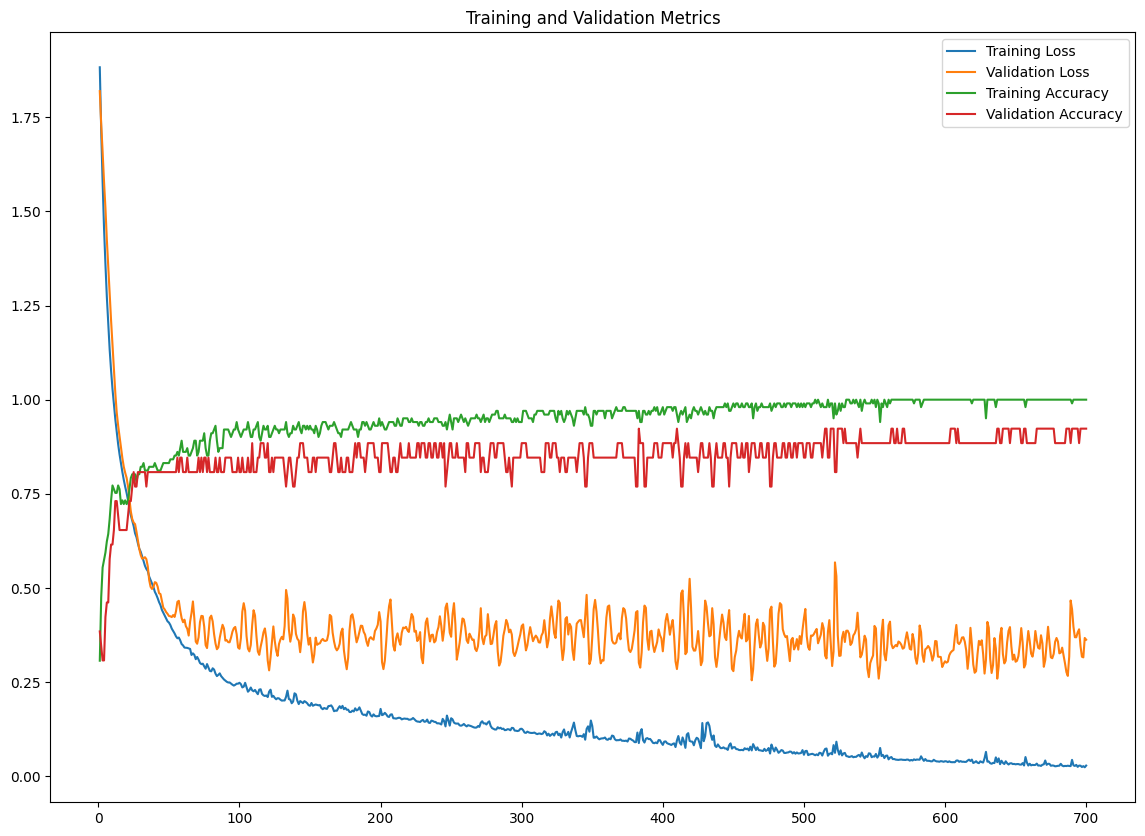

In [61]:
plt.figure(figsize=(14, 10))
epochs_range = range(1,epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Metrics')
plt.show()

In [62]:
np.argmin(val_loss)

np.int64(462)

In [64]:
nn_model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9062 - loss: 0.4119


[0.41190022230148315, 0.90625]